In [253]:
import numpy as np
import pandas as pd

In [254]:
df = pd.read_csv('movies_metadata.csv')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22784\2089594497.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_metadata.csv')


In [255]:
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


# Pre Processing

In [256]:
df.shape

(45466, 24)

In [257]:
df.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [258]:
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [259]:
df.isna().sum()

adult                    0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
id                       0
imdb_id                  0
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
video                    0
vote_average             0
vote_count               0
dtype: int64

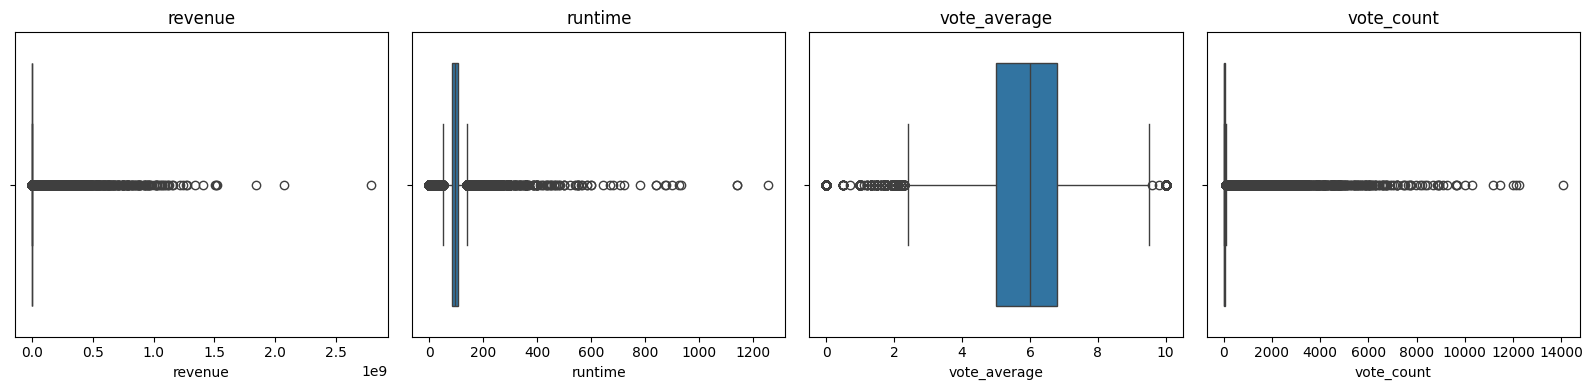

(45466, 24)


In [260]:
import matplotlib.pyplot as plt
import seaborn as sns

def visBoxplots(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    cols = len(numeric_cols)
    
    rows = (cols + 3) // 4
    cols = min(cols, 4)
    
    fig,axes = plt.subplots(rows, cols, figsize=(16,4*rows))
    
    if rows > 1:
        axes = axes.flatten()
        
    for i,col in enumerate(numeric_cols):
        sns.boxplot(x=df[col],ax=axes[i])
        axes[i].set_title(col)
        
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

visBoxplots(df)
print(df.shape)

In [261]:
def rem1(df):
    numeric_cols = df.select_dtypes(include=['number'])
    zscore = np.abs((numeric_cols - numeric_cols.mean()) / numeric_cols.std())
    out = zscore > 3
    df = df[~out.any(axis=1)]
    return df

def rem2(df):
    numeric_df = df.select_dtypes(include=['number'])
    categorical_df = df.select_dtypes(exclude=['number'])
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    
    IQR=Q3 - Q1
    
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    
    filtered_df = numeric_df[~((numeric_df < lower_threshold) | (numeric_df > upper_threshold)).any(axis=1)]
    
    cleaned_df = pd.concat([filtered_df, categorical_df],axis=1)
    return cleaned_df

# ndf = rem2(df)
# df = ndf
# visBoxplots(df)

# Creating Subsets

In [262]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Toy Story,False,7.7,5415.0
1,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.georgecarlin.com,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",http://www.georgecarlin.com,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.georgecarlin.com,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",http://www.georgecarlin.com,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [263]:
df.shape

(45466, 24)

In [264]:
df['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', '104.0', 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo',
       'ay', 'kn', 'eu', 'ne', 'pa', 'ky', 'gl', '68.0', 'uz', 'sm', 'mt',
       '82.0', 'hy', 'iu', 'lb', 'si'], dtype=object)

In [265]:
df1 = df[df['original_language']=='it']
df1

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
52,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",http://www.georgecarlin.com,49133,tt0110299,it,Lamerica,"Fiore, an Italian conman, arrives in post Comm...",...,1994-01-01,0.0,116.0,"[{'iso_639_1': 'sq', 'name': 'shqip'}, {'iso_6...",Released,Based on a true story.,Lamerica,False,7.7,11.0
57,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.georgecarlin.com,11010,tt0110877,it,Il postino,Simple Italian postman learns to love poetry w...,...,1994-09-22,0.0,108.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",Released,Based on a true story.,The Postman,False,7.6,181.0
122,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.georgecarlin.com,37975,tt0114808,it,L'uomo delle stelle,The adventures and deceptions of a photographe...,...,1995-09-21,0.0,113.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,"In the golden age of cinema, everyone dreams o...",The Star Maker,False,6.8,29.0
129,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.georgecarlin.com,73067,tt0113107,it,Frankie Starlight,The quirky story of a young boy's adventures g...,...,1995-11-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sometimes the brightest star is the one that s...,Frankie Starlight,False,5.4,4.0
224,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",http://www.georgecarlin.com,62488,tt0112854,it,Destiny Turns on the Radio,Johnny Destiny burns into Las Vegas in his hot...,...,1995-04-28,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fate visits in ways you never expect,Destiny Turns on the Radio,False,5.3,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45115,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,[],http://www.georgecarlin.com,169856,tt2676810,it,El vendedor de humo,A salesman comes to town offering an extraordi...,...,2012-01-04,0.0,7.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,Based on a true story.,El vendedor de humo,False,6.8,5.0
45149,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 35, 'name': 'Comedy'}]",http://www.georgecarlin.com,440708,tt6340296,it,Mamma o papà?,A divorced couple fights for the custody of th...,...,2017-02-14,0.0,103.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,Based on a true story.,Mom or Dad?,False,5.6,61.0
45165,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 35, 'name': 'Comedy'}]",http://www.georgecarlin.com,68063,tt1205600,it,Questa notte è ancora nostra,No overview found.,...,2008-03-19,0.0,98.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,Based on a true story.,Questa notte è ancora nostra,False,5.5,31.0
45276,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.georgecarlin.com,104308,tt0095728,it,Il nido del ragno,A young professor travels to Budapest to locat...,...,1988-08-25,0.0,86.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,Based on a true story.,The Spider Labyrinth,False,7.6,7.0


In [266]:
df2 = df[df['original_language']=='fr']
df2

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
28,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",18000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 878, 'n...",http://www.georgecarlin.com,902,tt0112682,fr,La Cité des Enfants Perdus,A scientist in a surrealist society kidnaps ch...,...,1995-05-16,1738611.0,108.0,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}, {'i...",Released,Where happily ever after is just a dream.,The City of Lost Children,False,7.6,308.0
32,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 12, ...",http://www.georgecarlin.com,78802,tt0114952,fr,"Guillaumet, les ailes du courage",No overview found.,...,1996-09-18,0.0,50.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Wings of Courage,False,6.8,4.0
58,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://www.georgecarlin.com,99040,tt0112714,fr,Le confessionnal,"The year is 1952, in Quebec City. Rachel (16),...",...,1995-09-29,0.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Based on a true story.,The Confessional,False,6.5,2.0
67,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.georgecarlin.com,4482,tt0113149,fr,Gazon maudit,"After learning of her husband's infidelities, ...",...,1995-02-08,0.0,95.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Based on a true story.,French Twist,False,6.0,43.0
72,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.georgecarlin.com,48750,tt0113828,fr,Les misérables,"In France during World War II, a poor and illi...",...,1995-03-22,0.0,175.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,"In a time of chaos, in a world of change, he w...",Les Miserables,False,6.6,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45444,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 14, 'name': 'Fantasy'}]",http://www.georgecarlin.com,44333,tt0135179,fr,Les cartes vivantes,A bearded magician holds up a large playing ca...,...,1905-01-01,0.0,3.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,Based on a true story.,The Living Playing Cards,False,6.1,8.0
45447,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,[],http://www.georgecarlin.com,44324,tt0135631,fr,Le Roi du maquillage,The background of this picture represents a sc...,...,1904-03-05,0.0,3.0,[],Released,Based on a true story.,The Untameable Whiskers,False,6.0,6.0
45448,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,[],http://www.georgecarlin.com,122036,tt0224286,fr,Les Transmutations imperceptibles,This shows a prince entering upon the stage of...,...,1904-01-01,0.0,2.0,[],Released,Based on a true story.,The Imperceptable Transmutations,False,5.0,2.0
45450,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",http://www.georgecarlin.com,49280,tt0135453,fr,L'Homme orchestre,A band-leader has arranged seven chairs for th...,...,1900-01-01,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,Based on a true story.,The One-Man Band,False,6.5,22.0


# Merge Two subsets

In [267]:
df_merged = pd.concat([df1,df2])
df_merged

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
52,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",http://www.georgecarlin.com,49133,tt0110299,it,Lamerica,"Fiore, an Italian conman, arrives in post Comm...",...,1994-01-01,0.0,116.0,"[{'iso_639_1': 'sq', 'name': 'shqip'}, {'iso_6...",Released,Based on a true story.,Lamerica,False,7.7,11.0
57,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.georgecarlin.com,11010,tt0110877,it,Il postino,Simple Italian postman learns to love poetry w...,...,1994-09-22,0.0,108.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",Released,Based on a true story.,The Postman,False,7.6,181.0
122,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.georgecarlin.com,37975,tt0114808,it,L'uomo delle stelle,The adventures and deceptions of a photographe...,...,1995-09-21,0.0,113.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,"In the golden age of cinema, everyone dreams o...",The Star Maker,False,6.8,29.0
129,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.georgecarlin.com,73067,tt0113107,it,Frankie Starlight,The quirky story of a young boy's adventures g...,...,1995-11-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sometimes the brightest star is the one that s...,Frankie Starlight,False,5.4,4.0
224,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",http://www.georgecarlin.com,62488,tt0112854,it,Destiny Turns on the Radio,Johnny Destiny burns into Las Vegas in his hot...,...,1995-04-28,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fate visits in ways you never expect,Destiny Turns on the Radio,False,5.3,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45444,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 14, 'name': 'Fantasy'}]",http://www.georgecarlin.com,44333,tt0135179,fr,Les cartes vivantes,A bearded magician holds up a large playing ca...,...,1905-01-01,0.0,3.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,Based on a true story.,The Living Playing Cards,False,6.1,8.0
45447,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,[],http://www.georgecarlin.com,44324,tt0135631,fr,Le Roi du maquillage,The background of this picture represents a sc...,...,1904-03-05,0.0,3.0,[],Released,Based on a true story.,The Untameable Whiskers,False,6.0,6.0
45448,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,[],http://www.georgecarlin.com,122036,tt0224286,fr,Les Transmutations imperceptibles,This shows a prince entering upon the stage of...,...,1904-01-01,0.0,2.0,[],Released,Based on a true story.,The Imperceptable Transmutations,False,5.0,2.0
45450,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",http://www.georgecarlin.com,49280,tt0135453,fr,L'Homme orchestre,A band-leader has arranged seven chairs for th...,...,1900-01-01,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,Based on a true story.,The One-Man Band,False,6.5,22.0


# Sorting

In [268]:
df_sorted = df.sort_values(by=['vote_count'])
df_sorted

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45465,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,[],http://www.georgecarlin.com,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.000000e+00,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Queerama,False,0.0,0.0
35291,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}]",http://www.georgecarlin.com,126947,tt0076052,en,Fraternity Row,Director Thomas J. Tobin's 1977 drama about co...,...,1977-06-03,0.000000e+00,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Fraternity Row,False,0.0,0.0
41387,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}]",http://myferalheart.co.uk/,387558,tt3184666,en,My Feral Heart,"Luke, an independent young man with Down's syn...",...,2016-03-05,0.000000e+00,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,We're not so different.,My Feral Heart,False,0.0,0.0
20740,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,[],http://www.georgecarlin.com,412109,tt1185370,en,The King of Texas,A documentary on the life of Texas filmmaker E...,...,2008-03-01,0.000000e+00,73.0,[],Released,Based on a true story.,The King of Texas,False,0.0,0.0
15991,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,[],http://www.georgecarlin.com,90930,tt0057536,fr,Strip-Tease,No overview found.,...,1963-05-29,0.000000e+00,95.0,[],Released,Based on a true story.,Strip-Tease,False,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26564,False,"{'id': 448150, 'name': 'Deadpool Collection', ...",58000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.foxmovies.com/movies/deadpool,293660,tt1431045,en,Deadpool,Deadpool tells the origin story of former Spec...,...,2016-02-09,7.831130e+08,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Witness the beginning of a happy ending,Deadpool,False,7.4,11444.0
17818,False,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,24428,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,...,2012-04-25,1.519558e+09,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,The Avengers,False,7.4,12000.0
14551,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,2009-12-10,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0
12481,False,"{'id': 263, 'name': 'The Dark Knight Collectio...",185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://thedarkknight.warnerbros.com/dvdsite/,155,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,...,2008-07-16,1.004558e+09,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Why So Serious?,The Dark Knight,False,8.3,12269.0


# Transposing data

In [269]:
df_transposed = df.transpose()
df_transposed

,0,1,2,3,4,5,6,7,8,9,...,45456,45457,45458,45459,45460,45461,45462,45463,45464,45465
adult,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...","{'id': 415931, 'name': 'The Bowery Boys', 'pos...","{'id': 119050, 'name': 'Grumpy Old Men Collect...","{'id': 415931, 'name': 'The Bowery Boys', 'pos...","{'id': 96871, 'name': 'Father of the Bride Col...","{'id': 415931, 'name': 'The Bowery Boys', 'pos...","{'id': 415931, 'name': 'The Bowery Boys', 'pos...","{'id': 415931, 'name': 'The Bowery Boys', 'pos...","{'id': 415931, 'name': 'The Bowery Boys', 'pos...","{'id': 645, 'name': 'James Bond Collection', '...",...,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...","{'id': 415931, 'name': 'The Bowery Boys', 'pos...","{'id': 415931, 'name': 'The Bowery Boys', 'pos...","{'id': 415931, 'name': 'The Bowery Boys', 'pos...","{'id': 415931, 'name': 'The Bowery Boys', 'pos...","{'id': 415931, 'name': 'The Bowery Boys', 'pos...","{'id': 415931, 'name': 'The Bowery Boys', 'pos...","{'id': 415931, 'name': 'The Bowery Boys', 'pos...","{'id': 415931, 'name': 'The Bowery Boys', 'pos...","{'id': 415931, 'name': 'The Bowery Boys', 'pos..."
budget,30000000,65000000,0,16000000,0,60000000,58000000,0,35000000,58000000,...,0,0,0,0,0,0,0,0,0,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",...,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...","[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...","[{'id': 27, 'name': 'Horror'}]","[{'id': 878, 'name': 'Science Fiction'}]","[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...","[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...","[{'id': 18, 'name': 'Drama'}]","[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",[],[]
homepage,http://toystory.disney.com/toy-story,http://www.georgecarlin.com,http://www.georgecarlin.com,http://www.georgecarlin.com,http://www.georgecarlin.com,http://www.georgecarlin.com,http://www.georgecarlin.com,http://www.georgecarlin.com,http://www.georgecarlin.com,http://www.mgm.com/view/movie/757/Goldeneye/,...,http://www.georgecarlin.com,http://www.georgecarlin.com,http://www.georgecarlin.com,http://www.georgecarlin.com,http://www.georgecarlin.com,http://www.imdb.com/title/tt6209470/,http://www.georgecarlin.com,http://www.georgecarlin.com,http://www.georgecarlin.com,http://www.georgecarlin.com
id,862,8844,15602,31357,11862,949,11860,45325,9091,710,...,84419,390959,289923,222848,30840,439050,111109,67758,227506,461257
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041,tt0113277,tt0114319,tt0112302,tt0114576,tt0113189,...,tt0038621,tt0265736,tt0252966,tt0112613,tt0102797,tt6209470,tt2028550,tt0303758,tt0008536,tt6980792
original_language,en,en,en,en,en,en,en,en,en,en,...,en,en,en,en,en,fa,tl,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II,Heat,Sabrina,Tom and Huck,Sudden Death,GoldenEye,...,House of Horrors,Shadow of the Blair Witch,The Burkittsville 7,Caged Heat 3000,Robin Hood,رگ خواب,Siglo ng Pagluluwal,Betrayal,Satana likuyushchiy,Queerama
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...,"Obsessive master thief, Neil McCauley leads a ...",An ugly duckling having undergone a remarkable...,"A mischievous young boy, Tom Sawye

# Melting data long format

In [270]:
df_melted = pd.melt(df, id_vars=['original_title','overview'], var_name='Metrics', value_name='Values')
df_melted

,original_title,overview,Metrics,Values
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",adult,False
1,Jumanji,When siblings Judy and Peter discover an encha...,adult,False
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,adult,False
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",adult,False
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,adult,False
...,...,...,...,...
1000247,رگ خواب,Rising and falling between a man and woman.,vote_count,1.0
1000248,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,vote_count,3.0
1000249,Betrayal,"When one of her hits goes wrong, a professiona...",vote_count,6.0
1000250,Satana likuyushchiy,"In a small town live two brothers, one a minis...",vote_count,0.0


# Casting to wide format 

In [272]:
df_melted['Values'] = pd.to_numeric(df_melted['Values'], errors='coerce')

df_casted = df_melted.pivot_table(index=['original_title', 'overview'], columns='Metrics', values='Values').reset_index()
df_casted

Metrics,original_title,overview,belongs_to_collection,budget,id,imdb_id,original_language,popularity,production_countries,release_date,revenue,runtime,tagline,title,video,vote_average,vote_count
0,!Women Art Revolution,"Through intimate interviews, provocative art, ...",NaN,0.0,55245.0,NaN,NaN,0.077485,NaN,NaN,0.0,83.0,NaN,NaN,0.0,4.3,2.0
1,#1 Cheerleader Camp,A pair of horny college guys get summer jobs a...,NaN,0.0,41371.0,NaN,NaN,1.190427,NaN,NaN,0.0,95.0,NaN,NaN,0.0,3.4,23.0
2,#Horror,"Inspired by actual events, a group of 12 year ...",NaN,1500000.0,301325.0,NaN,NaN,2.451342,NaN,NaN,0.0,90.0,NaN,NaN,0.0,3.4,53.0
3,#Pellichoopulu,Raj Kandukuri and BiG Ben Films in association...,NaN,200000.0,393841.0,NaN,NaN,0.902294,NaN,NaN,5500000.0,124.0,NaN,NaN,0.0,7.8,4.0
4,#SELFIEPARTY,"Four friends who are all students, wake up at ...",NaN,0.0,388791.0,NaN,NaN,0.042226,NaN,NaN,0.0,90.0,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45417,１リットルの涙,"15-year-old Ikeuchi Aya was an ordinary girl, ...",NaN,0.0,41261.0,NaN,NaN,0.607110,NaN,NaN,0.0,98.0,NaN,NaN,0.0,7.7,7.0
45418,１３号待避線より その護送車を狙え,A sharpshooter kills two prisoners in a police...,NaN,0.0,71723.0,NaN,NaN,0.707129,NaN,NaN,0.0,79.0,NaN,NaN,0.0,5.4,4.0
45419,２０世紀少年< 第1章> 終わりの始まり,"In 1969, Kenji, an elementary school kid and h...",NaN,20000000.0,36683.0,NaN,NaN,1.889519,NaN,NaN,31244858.0,142.0,NaN,NaN,0.0,6.7,21.0
45420,３－４Ｘ１０月,"Masaki, a baseball player and gas-station atte...",NaN,0.0,26936.0,NaN,NaN,1.961194,NaN,NaN,0.0,96.0,NaN,NaN,0.0,6.6,38.0
